In [1]:
import numpy 

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [4]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

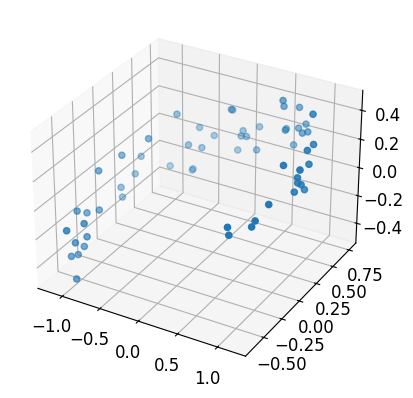

In [6]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()

In [7]:
import numpy as np

X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
c3 = Vt.T[:, 2]

In [8]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [9]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [10]:
W2 = Vt.T[:, :2]
print(W2)
X2D = X_centered.dot(W2)

[[ 0.93636116 -0.34027485]
 [ 0.29854881  0.90119108]
 [ 0.18465208  0.2684542 ]]


In [11]:
X2D_using_svd = X2D

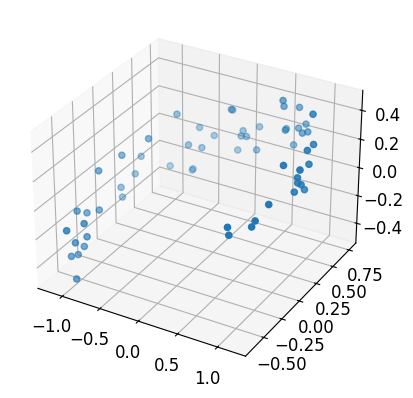

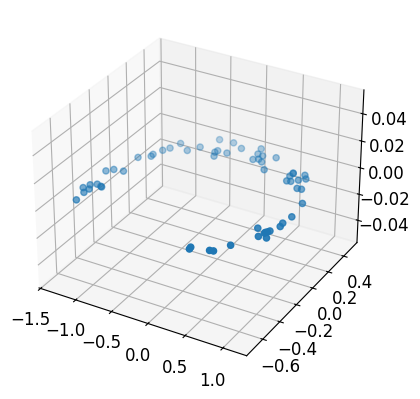

[[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


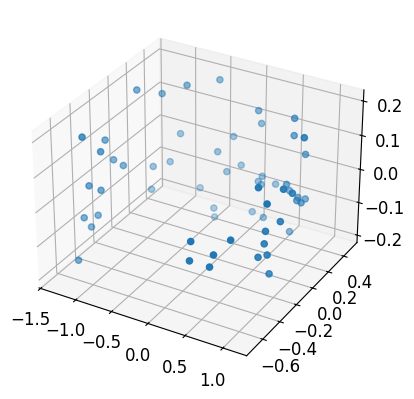

In [13]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
plt.show()
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X2D_using_svd[:, 0], X2D_using_svd[:, 1])
plt.show()

W3 = Vt.T[:, :3]
print(W3)
X3D = X_centered.dot(W3)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(X3D[:, 0], X3D[:, 1],  X3D[:, 2])
plt.show()

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
X2D = pca.fit_transform(X)

In [15]:
pca.components_

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

In [16]:
X3D_inv = pca.inverse_transform(X2D)

In [ ]:
X3D_inv = pca.inverse_transform(X2D)

In [17]:
np.allclose(X3D_inv, X)
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])
pca.components_
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [18]:
1 - pca.explained_variance_ratio_.sum()

np.float64(0.011195535570688975)

Exercise 1

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [20]:
np.random.seed(1)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T

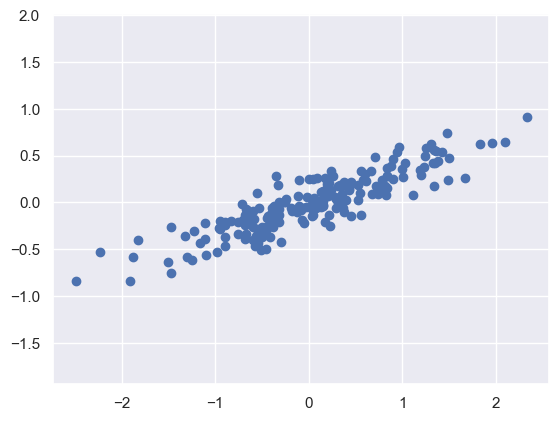

In [21]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)


PCA(n_components=2)

In [23]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


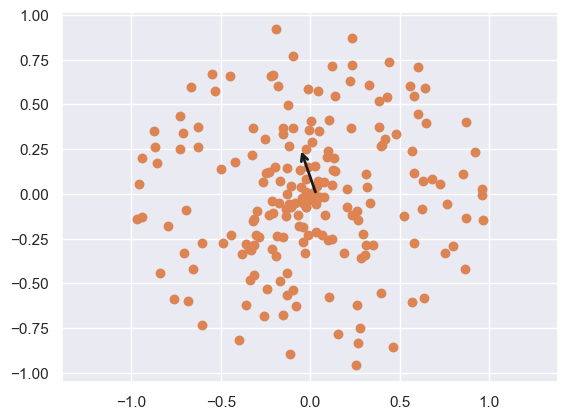

In [28]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
pca.explained_variance_ratio_
import math
np.random.seed(0)
X = np.zeros((200, 2))
R = 1
a = np.random.rand(200) * 2 * np.pi
r = np.random.rand(200)*R
X[:, 0] = np.cos(a) * r
X[:, 1] = np.sin(a) * r
plt.scatter(X[:, 0], X[:, 1])


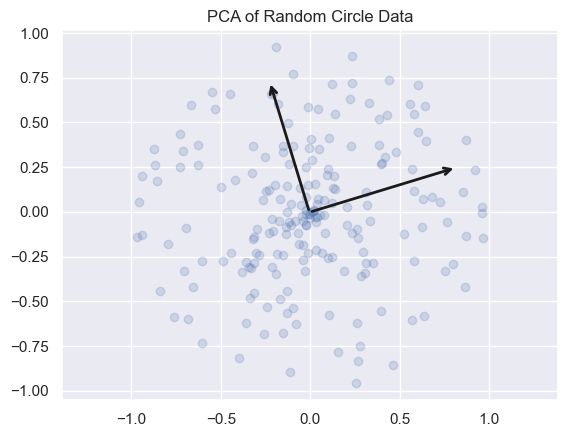

Explained variance ratio: [0.55817836 0.44182164]


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='k')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Generate data
np.random.seed(0)
X = np.zeros((200, 2))
R = 1
a = np.random.rand(200) * 2 * np.pi
r = np.random.rand(200) * R
X[:, 0] = np.cos(a) * r
X[:, 1] = np.sin(a) * r

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

# Now apply PCA
pca = PCA()
pca.fit(X)

# Draw principal components
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 2 * np.sqrt(length)  # scale the vector for better visualization
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.title('PCA of Random Circle Data')
plt.show()

# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)


In [30]:
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)
from sklearn.decomposition import PCA

pca = PCA()

In [31]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

Saving figure mnist_compression_plot


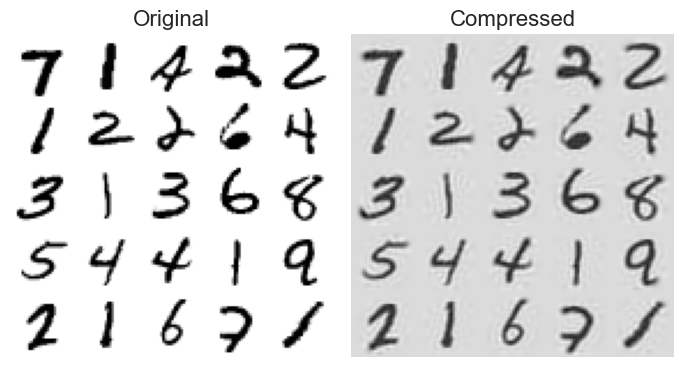

In [32]:
# Placing the number of components discovered before
pca = PCA(n_components = 43)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
# Placing the number of components discovered before
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100].to_numpy())
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

In [33]:
import time 

In [34]:
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]
from sklearn.ensemble import RandomForestClassifier
alg = RandomForestClassifier()
t_start = time.time()
alg.fit(X_train,y_train)
print(f'Finished with full svd method in {time.time() - t_start} seconds')

Finished with full svd method in 54.86085319519043 seconds


In [37]:
import time
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# 1. Load MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

# 2. Train Random Forest on original data
alg = RandomForestClassifier()

t_start = time.time()
alg.fit(X_train, y_train)
elapsed_full = time.time() - t_start

print(f'Finished training Random Forest on full data in {elapsed_full:.2f} seconds.')

# Evaluate on training data
y_pred_train = alg.predict(X_train)
train_acc_full = accuracy_score(y_train, y_pred_train)
print(f'Training accuracy on full data: {train_acc_full:.4f}')

# 3. Apply PCA keeping 95% variance
pca = PCA(n_components=0.95)  # keep 95% of the variance
t_start_pca = time.time()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca_elapsed = time.time() - t_start_pca

print(f'PCA transformation done in {pca_elapsed:.2f} seconds.')
print(f'Original shape: {X_train.shape}, After PCA: {X_train_pca.shape}')

# 4. Train Random Forest on PCA-reduced data
alg_pca = RandomForestClassifier()

t_start_pca_train = time.time()
alg_pca.fit(X_train_pca, y_train)
elapsed_pca_train = time.time() - t_start_pca_train

print(f'Finished training Random Forest on PCA data in {elapsed_pca_train:.2f} seconds.')

# Evaluate on PCA training data
y_pred_train_pca = alg_pca.predict(X_train_pca)
train_acc_pca = accuracy_score(y_train, y_pred_train_pca)
print(f'Training accuracy after PCA: {train_acc_pca:.4f}')


Finished training Random Forest on full data in 51.72 seconds.
Training accuracy on full data: 1.0000
PCA transformation done in 1.16 seconds.
Original shape: (60000, 784), After PCA: (60000, 154)
Finished training Random Forest on PCA data in 157.18 seconds.
Training accuracy after PCA: 1.0000


In [38]:
# Evaluate on training and test data for model trained on full features
y_pred_train = alg.predict(X_train)
y_pred_test = alg.predict(X_test)

train_acc_full = accuracy_score(y_train, y_pred_train)
test_acc_full = accuracy_score(y_test, y_pred_test)

print(f'\n--- Random Forest on Full Data ---')
print(f'Training Accuracy: {train_acc_full:.4f}')
print(f'Test Accuracy: {test_acc_full:.4f}')

# Evaluate on training and test data for model trained after PCA
y_pred_train_pca = alg_pca.predict(X_train_pca)
y_pred_test_pca = alg_pca.predict(X_test_pca)

train_acc_pca = accuracy_score(y_train, y_pred_train_pca)
test_acc_pca = accuracy_score(y_test, y_pred_test_pca)

print(f'\n--- Random Forest on PCA Data ---')
print(f'Training Accuracy after PCA: {train_acc_pca:.4f}')
print(f'Test Accuracy after PCA: {test_acc_pca:.4f}')



--- Random Forest on Full Data ---
Training Accuracy: 1.0000
Test Accuracy: 0.9699

--- Random Forest on PCA Data ---
Training Accuracy after PCA: 1.0000
Test Accuracy after PCA: 0.9487
